## Observations and Insights 

#1. Capomulin and Ramicane are the only successful medications in terms of halting tumor growth
#2. There is a positive correlation between weight and tumor volume, suggesting perhaps that the Capomulin treatment works and as the mice get better, they put on more weight.
#3. FOr the mouse chosen for the line plot, it is slightly concerning that the graph increases again at time 40, since that indicates the Capomulin not working, or only working to a certain degree, but since this is only one mouse, there aren't definitive conclusions that can be made from this data. 

In [1]:
# Dependencies and Setup

from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_pd = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
merged_pd.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the DataFrame.
len(merged_pd["Mouse ID"])

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_pd.groupby(["Mouse ID","Timepoint"]).count()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_pd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_pd2=merged_pd[["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]].copy()
merged_pd2.drop_duplicates(subset ="Mouse ID", 
                     keep = 'first', inplace = True) 

In [8]:
# Checking the number of mice in the clean DataFrame.
len(merged_pd2["Mouse ID"])


249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_df = merged_pd[["Drug Regimen", "Tumor Volume (mm3)"]].copy()


Summary_count_df = Summary_df.groupby(["Drug Regimen"]).count()
Summary_sum_df = Summary_df.groupby(["Drug Regimen"]).sum()
Summary_median_df = Summary_df.groupby(["Drug Regimen"]).median()
Summary_stdev_df = Summary_df.groupby(["Drug Regimen"]).std()
Summary_sem_df = Summary_df.groupby(["Drug Regimen"]).sem()

FINAL_pd = pd.merge(Summary_count_df, Summary_sum_df, on = "Drug Regimen", how = "outer")
FINAL_pd = pd.merge(FINAL_pd, Summary_median_df, on = "Drug Regimen", how = "outer")

FINAL_pd = FINAL_pd.rename(columns={"Tumor Volume (mm3)_x":"Count", "Tumor Volume (mm3)_y":"Sum", "Tumor Volume (mm3)": "Median"})
#Summary_df=Summary_df.describe()
FINAL_pd["Mean"]=FINAL_pd.Sum/FINAL_pd.Count

FINAL_pd = pd.merge(FINAL_pd, Summary_stdev_df, on = "Drug Regimen", how = "outer")
FINAL_pd = FINAL_pd.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
FINAL_pd["Variance"]=FINAL_pd["Standard Deviation"]**2

FINAL_pd = pd.merge(FINAL_pd, Summary_sem_df, on = "Drug Regimen", how = "outer")
FINAL_pd = FINAL_pd.rename(columns={"Tumor Volume (mm3)":"SEM"})

FINAL_pd
#Summary_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Count,Sum,Median,Mean,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,,
Capomulin,230,9355.420462,41.557809,40.675741,4.994774,24.947764,0.329346
Ceftamin,178,9361.228582,51.776157,52.591172,6.268188,39.290177,0.469821
Infubinol,178,9413.493529,51.820584,52.884795,6.567243,43.128684,0.492236
Ketapril,188,10384.299876,53.698743,55.235638,8.279709,68.553577,0.603860
Naftisol,186,10105.671026,52.509285,54.331565,8.134708,66.173479,0.596466
Placebo,181,9780.078122,52.288934,54.033581,7.821003,61.168083,0.581331
Propriva,161,8423.930878,50.854632,52.322552,6.507770,42.351070,0.512884
Ramicane,228,9169.417875,40.673236,40.216745,4.846308,23.486704,0.320955
Stelasyn,181,9816.199991,52.431737,54.233149,7.710419,59.450562,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_df = merged_pd[["Drug Regimen", "Tumor Volume (mm3)"]].copy()
single_df=Summary_df.groupby("Drug Regimen")
single_df.describe()

# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  161.0  52.322552  6.507770  45.000000  47.081086   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.854632  56.184664  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar Plots

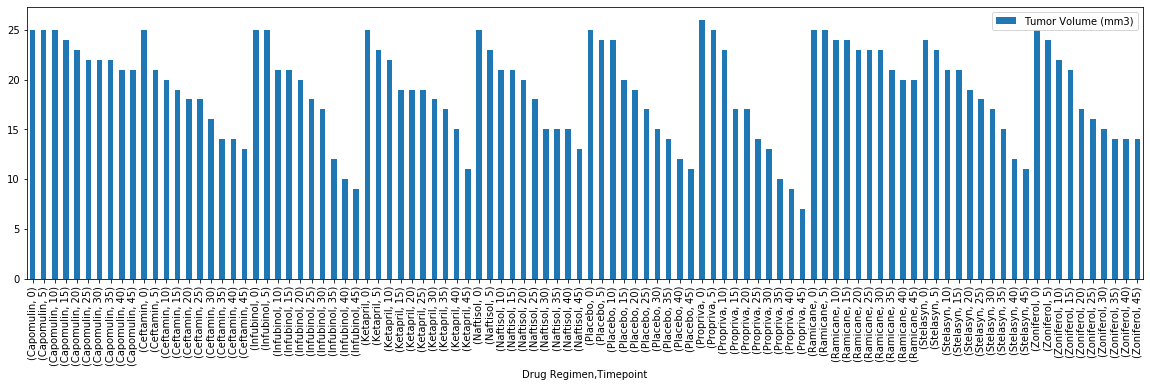

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

bar_df = merged_pd[["Drug Regimen", "Tumor Volume (mm3)","Timepoint"]].copy()
bar_df=bar_df.groupby(["Drug Regimen", "Timepoint"]).count()
bar_df.plot(kind="bar", figsize=(20,5))

<BarContainer object of 100 artists>

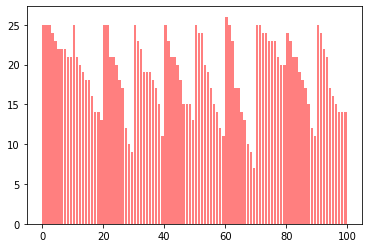

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
bar_df = merged_pd[["Drug Regimen", "Tumor Volume (mm3)","Timepoint"]].copy()
bar_df=bar_df.groupby(["Drug Regimen", "Timepoint"]).count()

x = np.arange(len(bar_df))
#labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.bar(x, bar_df["Tumor Volume (mm3)"], color='r', alpha=0.5, align="edge")



## Pie Plots

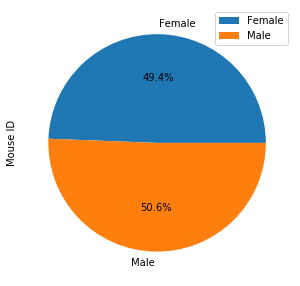

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_pd = merged_pd[["Sex", "Mouse ID"]].copy()
sex_pd.head()
sex_pd= sex_pd.groupby(["Sex"]).count()
sex_pd
sex_pd.plot.pie(y='Mouse ID', figsize=(5, 5),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2189121d710>,
 [Text(0.02099250347258556, 1.0997996703027118, 'female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

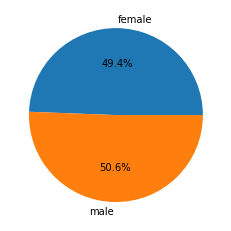

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pd = merged_pd[["Sex", "Mouse ID"]].copy()
sex_pd.head()
sex_pd= sex_pd.groupby(["Sex"]).count()
plt.pie(sex_pd["Mouse ID"], labels=["female", "male"],autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Quartile = merged_pd[["Drug Regimen", "Tumor Volume (mm3)", "Mouse ID", "Timepoint"]].copy()
#Quartile.groupby(["Drug Regimen", "Timepoint"]).mean()

# Get names of indexes for which column Age has value 30
indexNames = Quartile[ Quartile['Timepoint'] < 45 ].index

# Delete these row indexes from dataFrame
Quartile.drop(indexNames , inplace=True)



#find 4 most successful Capomulin, Ramicane, Ceftamin, Infubinol
    #Quartile = Quartile.groupby(["Drug Regimen"]).mean()
    #Quartile.sort_values(by='Tumor Volume (mm3)', ascending=True)

filtering1 = Quartile['Drug Regimen'].str.contains('Capomulin') 
Capomulin = Quartile[filtering1]
Capomulin = Capomulin["Tumor Volume (mm3)"]

capquar = Capomulin.quantile([.25,.5,.75])
caplow = capquar[0.25]
capup = capquar[0.75]
capiqr = capup-caplow

#find quartiles for Ramicane
filtering2 = Quartile['Drug Regimen'].str.contains('Ramicane') 
Ramicane = Quartile[filtering2]
Ramicane = Ramicane["Tumor Volume (mm3)"]

ramquar = Ramicane.quantile([.25,.5,.75])
ramlow = ramquar[0.25]
ramup = ramquar[0.75]
ramiqr = ramup-ramlow

#find quartiles for Ceftamin
filtering3 = Quartile['Drug Regimen'].str.contains('Ceftamin') 
Ceftamin = Quartile[filtering3]
Ceftamin = Ceftamin["Tumor Volume (mm3)"]

cefquar = Ceftamin.quantile([.25,.5,.75])
ceflow = cefquar[0.25]
cefup = cefquar[0.75]
cefiqr = cefup-ceflow

#find quartiles for Infubinol
filtering4 = Quartile['Drug Regimen'].str.contains('Infubinol') 
Infubinol = Quartile[filtering4]
Infubinol = Infubinol["Tumor Volume (mm3)"]

infquar = Infubinol.quantile([.25,.5,.75])
inflow = infquar[0.25]
infup = infquar[0.75]
infiqr = infup-inflow

quartiles_df = pd.DataFrame({
    "Quartiles":["Quartile 1", "Quartile 3", "Interquartile Range"],
    "Capomulin":[caplow, capup, capiqr],
    "Ramicane":[ramlow, ramup, ramiqr],
    "Ceftamin":[ceflow, cefup, cefiqr],
    "Infubinol":[inflow, infup, infiqr]
})
quartiles_df.set_index("Quartiles")


,Capomulin,Ramicane,Ceftamin,Infubinol
Quartiles,,,,
Quartile 1,32.377357,30.981175,61.433892,62.754451
Quartile 3,40.159220,38.508305,67.527482,67.685569
Interquartile Range,7.781863,7.527130,6.093590,4.931117


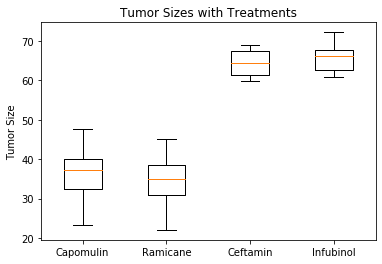

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#boxplot_df = pd.DataFrame(columns=[Capomulin, Ramicane, Ceftamin, Infubinol])
fig1, ax1 = plt.subplots()

ax1.set_title('Tumor Sizes with Treatments')
ax1.set_ylabel('Tumor Size')
labels=["Capomulin", "Ramicane", "Ceftamin", "Infubinol"]

ax1.boxplot([Capomulin, Ramicane, Ceftamin, Infubinol], labels=labels)

plt.show()


## Line and Scatter Plots

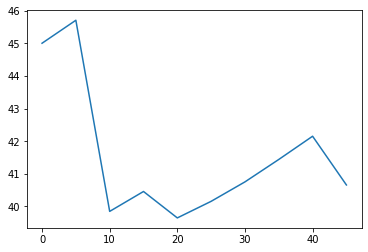

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Line_pd = merged_pd[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]].copy
Line_pd = pd.DataFrame(merged_pd)
line_pts = Line_pd['Drug Regimen'].str.contains('Capomulin') 
Line_pd = Line_pd[line_pts]
Line_pd=Line_pd.drop(columns=["Sex", "Age_months", "Weight (g)", "Metastatic Sites"])
Line_pd.head()

#mice=Line_pd["Mouse ID"].unique()


find_mouse = Line_pd['Mouse ID'].str.contains('v923') 
Line_pd = Line_pd[find_mouse]
Line_pd.head()
plt.plot(Line_pd.Timepoint, Line_pd["Tumor Volume (mm3)"])
#Line_pd.T

#for i in mice:
    #plt.plot(Line_pd.Timepoint, Line_pd["Tumor Volume (mm3)"])


Text(0.5, 1.0, 'Weight versus Tumor Volume')

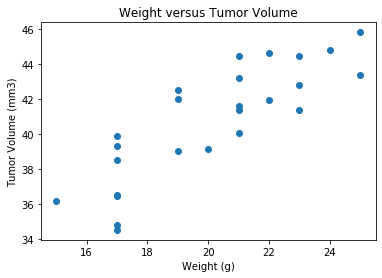

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Line_pd = merged_pd[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]].copy
Line_pd = pd.DataFrame(merged_pd)
line_pts = Line_pd['Drug Regimen'].str.contains('Capomulin') 
Line_pd = Line_pd[line_pts]
Line_pd=Line_pd.drop(columns=["Sex", "Age_months", "Metastatic Sites", "Timepoint"])
Line_pd = Line_pd.groupby("Mouse ID").mean()


plt.scatter(Line_pd["Weight (g)"], Line_pd["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight versus Tumor Volume")

## Correlation and Regression

The correlation coefficient is: (0.8419363424694717, 1.322572243471279e-07)
The linear equation is: y = 0.95x + 21.55


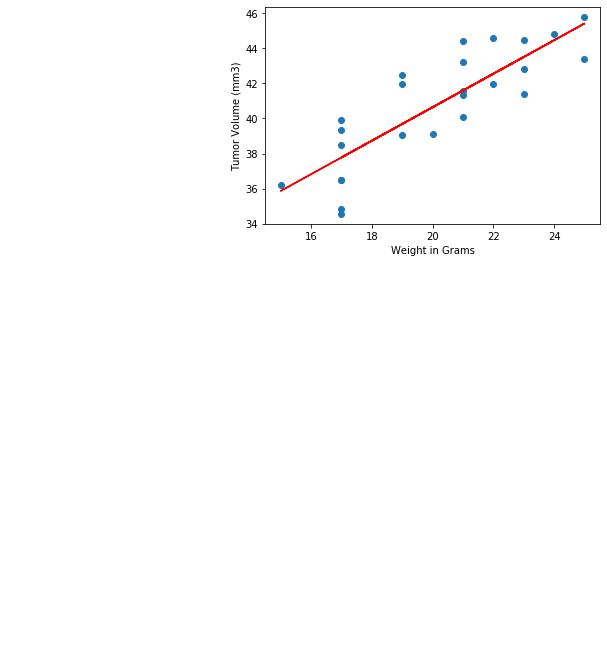

In [262]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Line_pd = merged_pd[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]].copy
Line_pd = pd.DataFrame(merged_pd)
line_pts = Line_pd['Drug Regimen'].str.contains('Capomulin') 
Line_pd = Line_pd[line_pts]
Line_pd=Line_pd.drop(columns=["Sex", "Age_months", "Metastatic Sites", "Timepoint"])
Line_pd = Line_pd.groupby("Mouse ID").mean()


weight = Line_pd["Weight (g)"]
tumor = Line_pd['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)

x_values = Line_pd["Weight (g)"]
y_values = Line_pd['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {correlation}")
print("The linear equation is: " + line_eq)
plt.show()
